In [211]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [212]:
pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [213]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [214]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

In [215]:
df_iris = sns.load_dataset('iris')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


1. iris 품종별 개수

In [216]:
df_iris[['species']].value_counts()

species   
setosa        50
versicolor    50
virginica     50
dtype: int64

2. 품종으로 그룹을 만들고 petal_length에 대한 품종별 개수 구하기

In [217]:
iris_g = df_iris.groupby('species')['petal_length'].agg('count')
print(iris_g)

species
setosa        50
versicolor    50
virginica     50
Name: petal_length, dtype: int64


품종을 제외한 나머지 컬럼의 이름을 SL SW PL PW 으로 변경하고 새로운 dataframe 생성

In [218]:
df_iris.rename(columns = {'sepal_length' : 'SL','sepal_width' : 'SW','petal_length' : 'PL','petal_width': 'PW'}, inplace = True)
df_iris

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [219]:
df = pd.DataFrame(df_iris)
df

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


sl sw 칼럼에서 10번째 ~ 20번째 까지의 데이터를 추출

In [220]:
df.loc[10:20, ['SL']]

,SL
10,5.4
11,4.8
12,4.8
13,4.3
14,5.8
15,5.7
16,5.4
17,5.1
18,5.7
19,5.1


In [221]:
df.loc[10:20, ['SW']]

,SW
10,3.7
11,3.4
12,3.0
13,3.0
14,4.0
15,4.4
16,3.9
17,3.5
18,3.8
19,3.8


각 컬럼에 대해서 boxplot histogram scatter 를 추출하여 데이터 분포를 확인

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


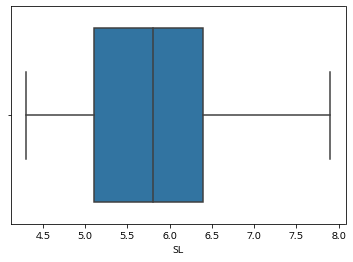

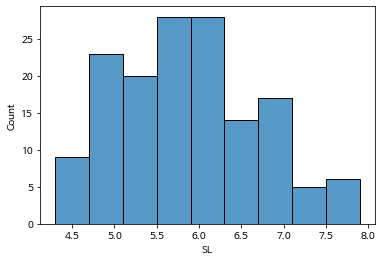

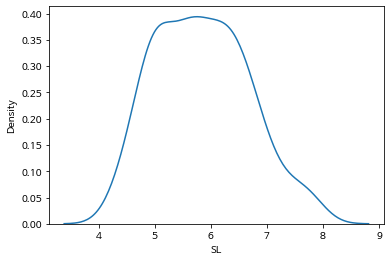

In [222]:
sns.boxplot(df['SL'])
plt.figure()
sns.histplot(df['SL'])
plt.figure()
sns.kdeplot(df['SL'])

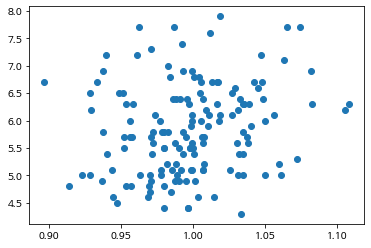

In [223]:
def boxplot_scatter(col):
  for i ,d in enumerate(col):
    y = col[d]
    x = np.random.normal(i+1,0.04,len(y))
    plt.scatter(x,y)

boxplot_scatter(df[['SL']])


평균 분산 사분위 값을 구하기




In [246]:
def get_quantile(col):
  Q1 =  col.quantile(q=0.25)
  Q2 =  col.quantile(q=0.50)
  Q3 =  col.quantile(q=0.75)

  print('Q1 : ', Q1)
  print('Q2 : ', Q2)
  print('Q3 : ', Q3)

  return Q1, Q2, Q3

# SL	SW	PL	PW

print('SL 평균 : ', df['SL'].mean())
print('SL 분산 : ', df['SL'].var())
get_quantile(df['SL'])
print()
print('SW 평균 : ', df['SW'].mean())
print('SW 분산 : ', df['SW'].var())
get_quantile(df['SW'])
print()
print('PL 평균 : ', df['PL'].mean())
print('PL 분산 : ', df['PL'].var())
get_quantile(df['PL'])
print()
print('PW 평균 : ', df['PW'].mean())
print('PW 분산 : ', df['PW'].var())
get_quantile(df['PW'])

SL 평균 :  5.841780821917808
SL 분산 :  0.6977595654227683
Q1 :  5.1
Q2 :  5.8
Q3 :  6.4

SW 평균 :  3.0609589041095893
SW 분산 :  0.19287907416154937
Q1 :  2.8
Q2 :  3.0
Q3 :  3.375

PL 평균 :  3.747260273972603
PL 분산 :  3.126371752479924
Q1 :  1.6
Q2 :  4.3
Q3 :  5.1

PW 평균 :  1.2116438356164385
PW 분산 :  0.5835186584789798
Q1 :  0.3
Q2 :  1.3
Q3 :  1.8


(0.3, 1.3, 1.8)

각 컬럼에서 랜덤하게 3개이상의 결측치로 대체하기

In [226]:
# def make_nan(df, col, count):
#   idx = df[col].sample(n=count).index
#   print(idx)
#   list_idx = list(idx)
#   for i in list_idx:
#     print(i)
#     print(type(i))

#     print('iloc : ',df.iloc[i,df[col]])
#     df.loc[i,df[col]] = np.nan
#     print(df.loc[i,df[col]])

# make_nan(df,'SL', 4)
# df

,SL,SW,PL,PW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [231]:
idx = df['SL'].sample(n=4).index
df.loc[idx,'SL'] = np.nan

In [ ]:
df['SL'].isna().sum()

In [234]:
idx = df['SW'].sample(n=4).index
df.loc[idx,'SW'] = np.nan
df['SW'].isna().sum()

4

In [235]:
idx = df['PL'].sample(n=4).index
df.loc[idx,'PL'] = np.nan
df['PL'].isna().sum()

4

In [236]:
idx = df['PW'].sample(n=4).index
df.loc[idx,'PW'] = np.nan
df['PW'].isna().sum()

4

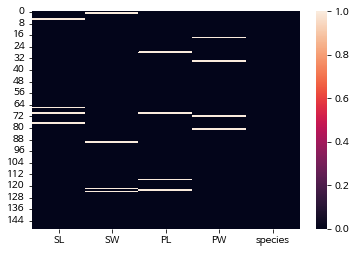

In [237]:
sns.heatmap(df.isna())

In [238]:
df.isna().sum()

SL         4
SW         4
PL         4
PW         4
species    0
dtype: int64

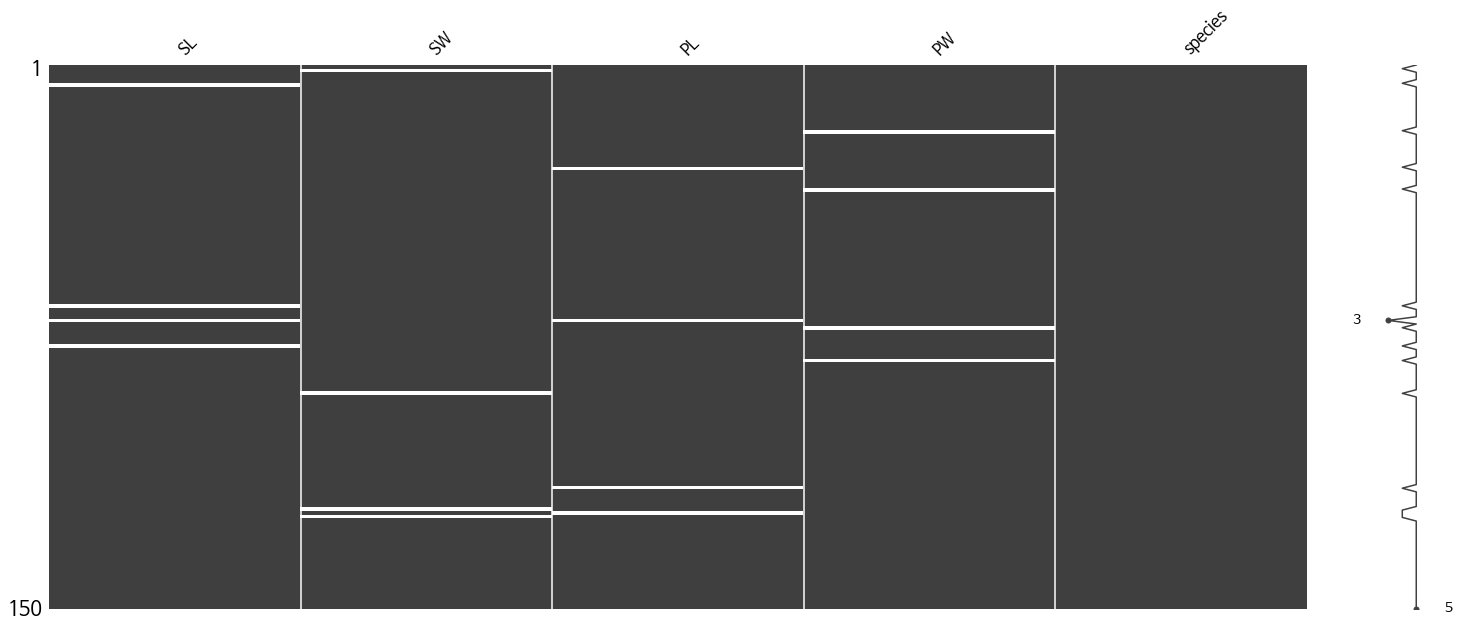

In [240]:
import missingno as msno 
msno.matrix(df)

In [249]:
# 이상치 확인
Q1, Q2 ,Q3 = get_quantile(df['SL'])
iqr_w = (Q3-Q1)*1.5
th_min = Q1 - iqr_w
th_max = Q3 + iqr_w
df[(df['SL'] <th_min) | (df['SL'] > th_max)]

Q1 :  5.1
Q2 :  5.8
Q3 :  6.4
5.1
6.4


,SL,SW,PL,PW,species


In [250]:
# 이상치 확인
Q1, Q2 ,Q3 = get_quantile(df['SW'])
iqr_w = (Q3-Q1)*1.5
th_min = Q1 - iqr_w
th_max = Q3 + iqr_w
de_idx = df[(df['SW'] <th_min) | (df['SW'] > th_max)].index


Q1 :  2.8
Q2 :  3.0
Q3 :  3.375


,SL,SW,PL,PW,species
15,5.7,4.4,1.5,0.4,setosa


In [ ]:
df.drop(index = idx, inplace=True)

In [251]:
# 이상치 확인
Q1, Q2 ,Q3 = get_quantile(df['PL'])
iqr_w = (Q3-Q1)*1.5
th_min = Q1 - iqr_w
th_max = Q3 + iqr_w
df[(df['PL'] <th_min) | (df['PL'] > th_max)]

Q1 :  1.6
Q2 :  4.3
Q3 :  5.1


,SL,SW,PL,PW,species


In [252]:
# 이상치 확인
Q1, Q2 ,Q3 = get_quantile(df['PW'])
iqr_w = (Q3-Q1)*1.5
th_min = Q1 - iqr_w
th_max = Q3 + iqr_w
df[(df['PW'] <th_min) | (df['PW'] > th_max)]

Q1 :  0.3
Q2 :  1.3
Q3 :  1.8


,SL,SW,PL,PW,species




결측치를 적절한 값으로 대체



이상치를 확인하고 처리하기